In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256 #image size will be 256x256
CHANNELS=3 #we will use rgb image for this dataset
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "./../Datasets/train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 451 files belonging to 7 classes.


In [4]:
classes_name=dataset.class_names
classes_name

['Black Scurf',
 'Blackleg',
 'Common Scab',
 'Dry Rot',
 'Healthy Potatoes',
 'Miscellaneous',
 'Pink Rot']

In [5]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+val_split+test_split) ==1
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [6]:
train_ds,val_ds,test_ds=get_dataset_partition(dataset)

In [7]:
len(train_ds)

12

In [8]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].numpy().shape)

[[[ 41.        40.        35.      ]
  [ 41.        40.        35.      ]
  [ 42.375     41.375     36.375   ]
  ...
  [ 20.        22.        18.375   ]
  [ 20.375     22.375     17.375   ]
  [ 22.        24.        19.      ]]

 [[ 41.        40.        35.      ]
  [ 41.        40.        35.      ]
  [ 42.375     41.375     36.375   ]
  ...
  [ 20.        22.        18.375   ]
  [ 20.222656  22.222656  17.222656]
  [ 21.1875    23.1875    18.1875  ]]

 [[ 41.        40.        35.      ]
  [ 40.441406  39.441406  34.441406]
  [ 42.160156  41.160156  36.160156]
  ...
  [ 21.375     22.214844  19.0625  ]
  [ 21.304688  22.617188  17.617188]
  [ 21.        22.3125    17.3125  ]]

 ...

 [[ 70.3125    66.3125    54.3125  ]
  [ 70.87109   66.87109   54.871094]
  [ 70.3125    67.6875    55.      ]
  ...
  [255.       250.       238.      ]
  [255.       250.6875   238.6875  ]
  [255.       250.6875   238.6875  ]]

 [[ 71.        67.        55.      ]
  [ 71.        67.        55.      ]


In [10]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=7

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=input_shape)

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
12/12 [==============================] - 61s 4s/step - loss: 1.9619 - accuracy: 0.1577 - val_loss: 1.9409 - val_accuracy: 0.2812
Epoch 2/50
12/12 [==============================] - 35s 3s/step - loss: 1.9363 - accuracy: 0.1887 - val_loss: 1.9309 - val_accuracy: 0.3750
Epoch 3/50
12/12 [==============================] - 37s 3s/step - loss: 1.9269 - accuracy: 0.2592 - val_loss: 1.8930 - val_accuracy: 0.3438
Epoch 4/50
12/12 [==============================] - 35s 3s/step - loss: 1.8832 - accuracy: 0.2394 - val_loss: 1.7318 - val_accuracy: 0.3750
Epoch 5/50
12/12 [==============================] - 36s 3s/step - loss: 1.8668 - accuracy: 0.2169 - val_loss: 1.9573 - val_accuracy: 0.1562
Epoch 6/50
12/12 [==============================] - 35s 3s/step - loss: 1.8306 - accuracy: 0.2620 - val_loss: 1.6321 - val_accuracy: 0.3438
Epoch 7/50
12/12 [==============================] - 36s 3s/step - loss: 1.7658 - accuracy: 0.2873 - val_loss: 1.7139 - val_accuracy: 0.3750
Epoch 8/50
12/12 [==

In [15]:
scores=model.evaluate(test_ds)

2/2 [==============================] - 1s 305ms/step - loss: 1.0125 - accuracy: 0.5781


In [16]:
loss=history.history['loss']
val_loss=history.history['val_loss']

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

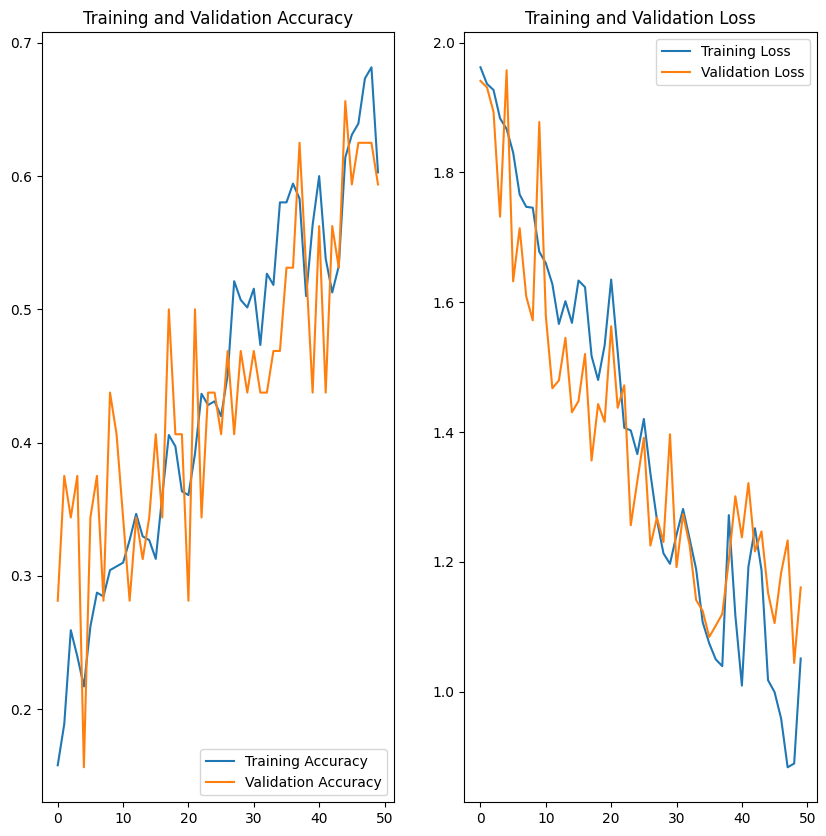

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.savefig('./../Images/Accuracy_model2.png')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.savefig('./../Images/Loss_model2.png')

First image to predict
Actual Label :  Miscellaneous
1/1 [==============================] - 0s 249ms/step
Predicted label :  Common Scab


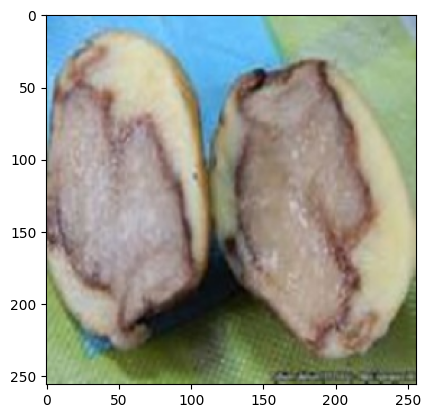

In [38]:
import numpy as np

for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[4].numpy().astype('uint8')
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label : ",classes_name[label_batch[0].numpy()])

    batch_prediction=model.predict(image_batch)
    print("Predicted label : ",classes_name[np.argmax(batch_prediction[0])])

In [39]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)  #create a batch

    prediction = model.predict(img_array)
    predicted_class=classes_name[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)

    return predicted_class,confidence

1/1 [==============================] - 0s 27ms/step


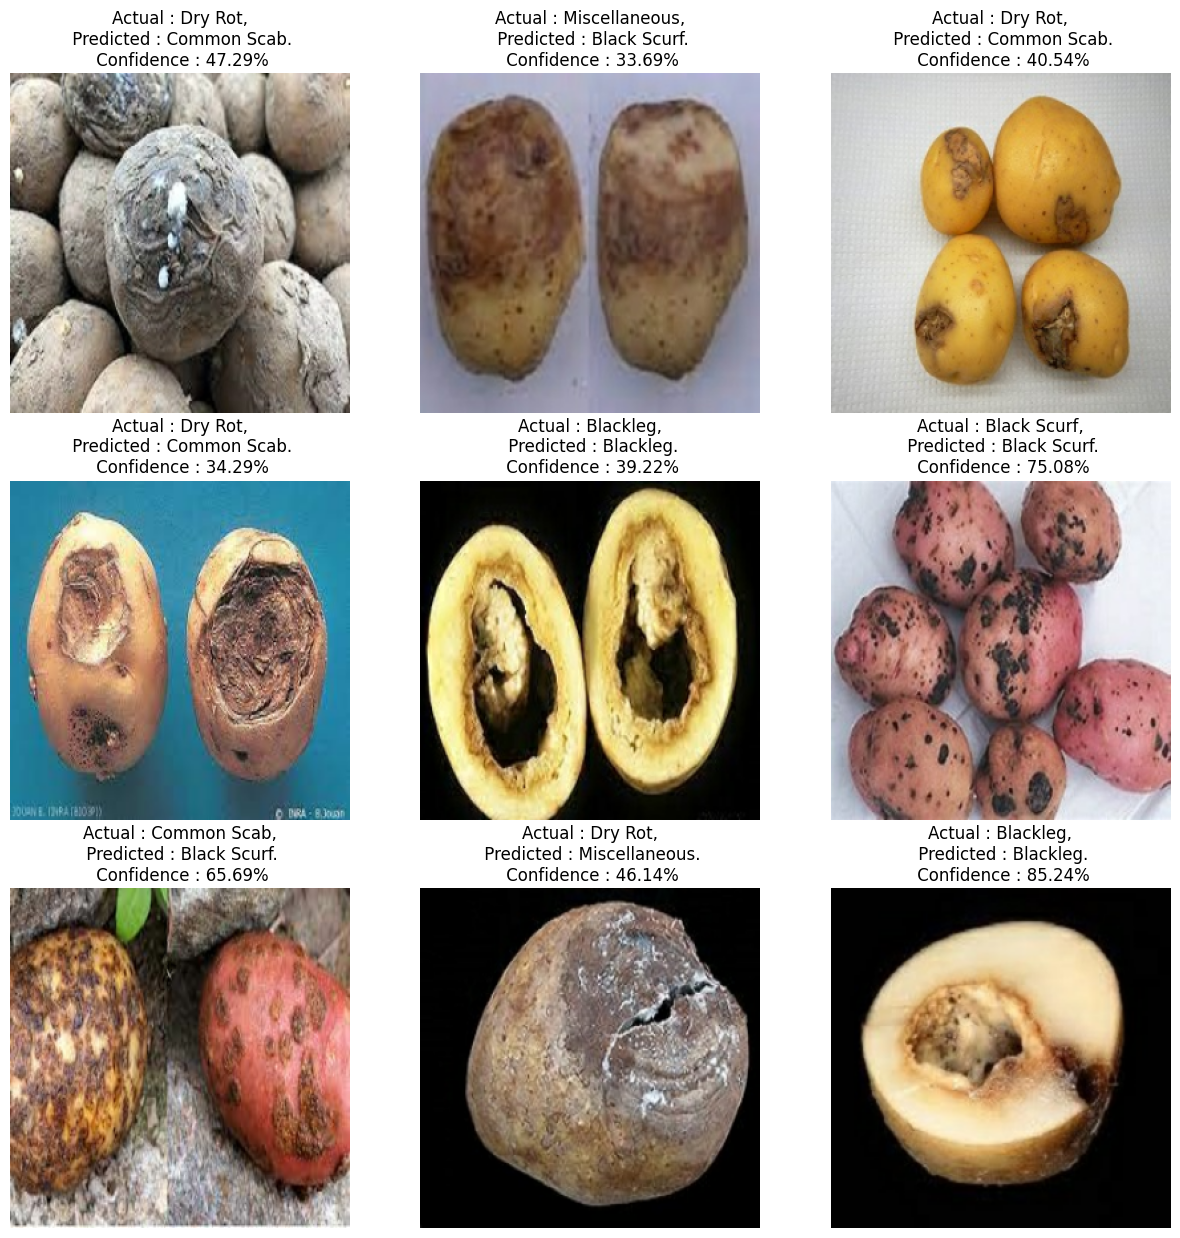

In [40]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=classes_name[labels[i]]
        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class}.\n Confidence : {confidence}%")
        plt.axis('off')